In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
# Flatten the image since we cannot feed the Dense layers 2D images, it expects 1D input.

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Normalize the pixel value to range [0.0, 1.0]

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

# Sample
print("y_train sample:", y_train[:10])

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape : (60000,)
y_test shape : (10000,)
y_train sample: [5 0 4 1 9 2 1 3 1 4]


In [4]:
model = Sequential([
    Dense(units=128, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8766 - loss: 0.4217 - val_accuracy: 0.9649 - val_loss: 0.1181
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9678 - loss: 0.1058 - val_accuracy: 0.9673 - val_loss: 0.1017
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9791 - loss: 0.0667 - val_accuracy: 0.9749 - val_loss: 0.0793
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0496 - val_accuracy: 0.9780 - val_loss: 0.0722
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0383 - val_accuracy: 0.9746 - val_loss: 0.0785
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9897 - loss: 0.0315 - val_accuracy: 0.9744 - val_loss: 0.0797
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - loss: 0.0242 - val_accuracy: 0.9758 - val_loss: 0.0858
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9925 - loss: 0

In [5]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.9753 - loss: 0.3586
Test Accuracy: 0.9787
Test Loss: 0.3139


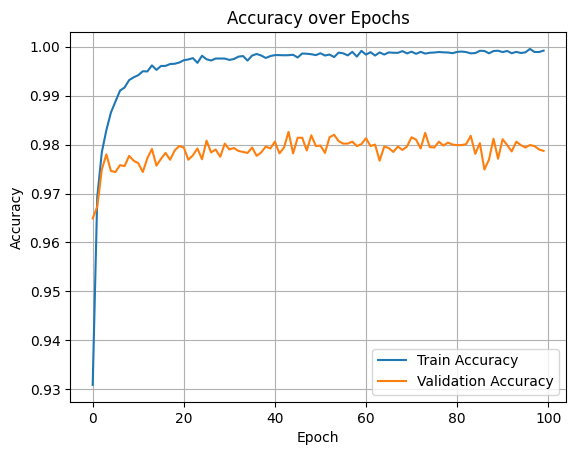

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

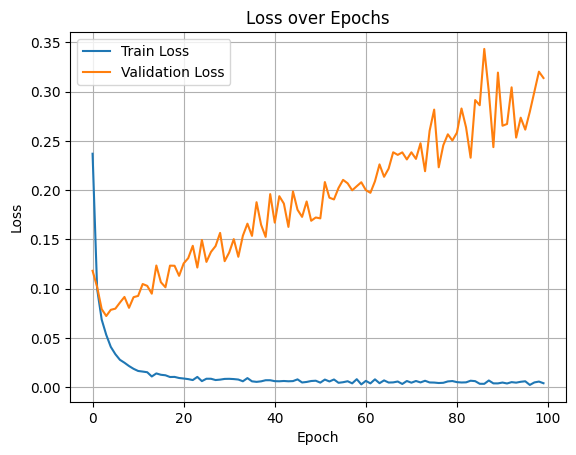

In [7]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import numpy as np

# Predict class probabilities
probs = model.predict(X_test[:5])

# Convert probabilities to predicted class
predicted_classes = np.argmax(probs, axis=1)

print("Predicted classes:", predicted_classes)
print("True labels:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted classes: [7 2 1 0 4]
True labels: [7 2 1 0 4]


In [10]:
model.save("mnist_dense_model.keras")